<a href="https://www.kaggle.com/code/ahmedhisham73/model-ensemble?scriptVersionId=138268630" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv


**Reading data**

In [2]:
import pandas as pd

# define file paths
test_data_path = "/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv"
train_data_path = "/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv"

# read the .csv files
test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)


In [3]:
print(train_data.head())
print(train_data.info())


   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  
<class 'pandas.core.

In [4]:
# print the column names
print(train_data.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [5]:
# Check for null values in train_data
null_values = train_data.isnull().sum()

# Print the count of null values per column
print(null_values)


uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [6]:
# Get unique values and their counts in the 'condition' column
condition_counts = train_data['condition'].value_counts()

# Print the unique values and their counts
print(condition_counts)


Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64


In [7]:
# Get unique values and their counts in the 'condition' column
condition_counts = train_data['condition'].value_counts()

# Filter conditions with counts more than 5000
frequent_conditions = condition_counts[condition_counts > 5000]

# Print the filtered conditions and their counts
print(frequent_conditions)


Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: condition, dtype: int64


In [8]:
# Define the conditions to keep
conditions_to_keep = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']

# Filter the DataFrame to only include the specified conditions
filtered_data = train_data[train_data['condition'].isin(conditions_to_keep)]

# Now filtered_data only includes rows where the 'condition' is in conditions_to_keep


In [9]:
# Define the conditions and features to keep
conditions_to_keep = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']
features_to_keep = ['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date']

# Filter the DataFrame to only include the specified conditions and features
filtered_data = train_data[train_data['condition'].isin(conditions_to_keep)][features_to_keep]


In [10]:
# Get the count of non-null values in each feature
feature_counts = filtered_data.count()

# Print the counts
print(feature_counts)


uniqueID     55494
drugName     55494
condition    55494
review       55494
rating       55494
date         55494
dtype: int64


In [11]:
# Get the shape of the DataFrame
data_shape = filtered_data.shape

# Print the shape
print(data_shape)


(55494, 6)


In [12]:
# Select 'review', 'condition', and 'rating' columns and create a new DataFrame
data_first_stage = filtered_data[['review', 'condition', 'rating']]


In [13]:
# Get the shape of the DataFrame
data_shape = data_first_stage.shape

# Print the shape
print(data_shape)


(55494, 3)


In [14]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to handle all text preprocessing
def preprocess_text(text):
    # Apply the pipeline to your text
    doc = nlp(text)
    
    # Tokenize, lower case, and lemmatize the text
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply the preprocessing function to the 'review' column
data_first_stage['review'] = data_first_stage['review'].apply(preprocess_text)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

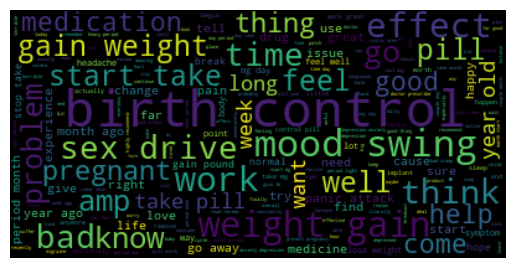

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into one string
all_reviews = ' '.join(data_first_stage['review'])

# Create and generate a word cloud image
wordcloud = WordCloud().generate(all_reviews)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


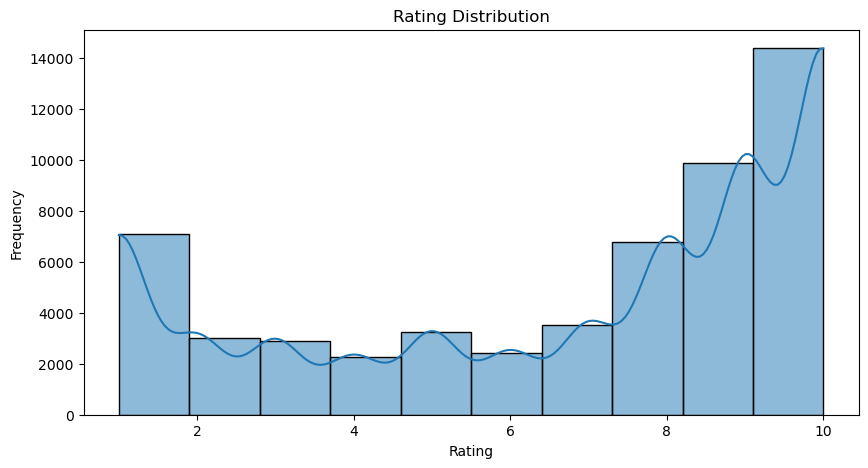

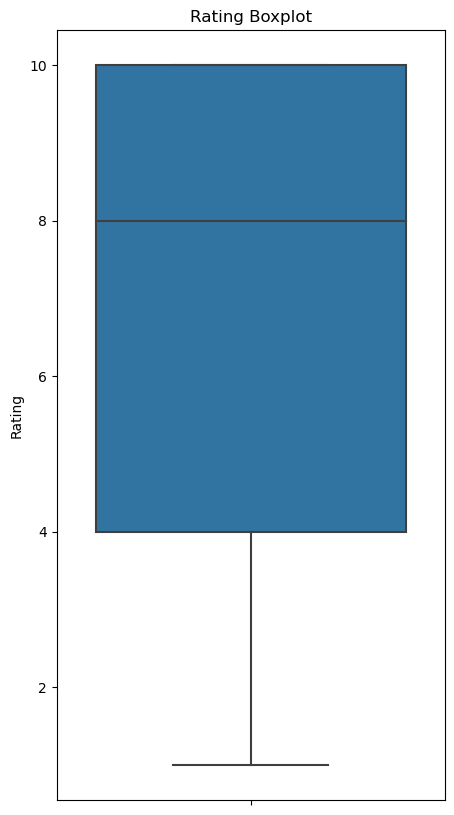

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data_first_stage['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot
plt.figure(figsize=(5,10))
sns.boxplot(y=data_first_stage['rating'])
plt.title('Rating Boxplot')
plt.ylabel('Rating')
plt.show()


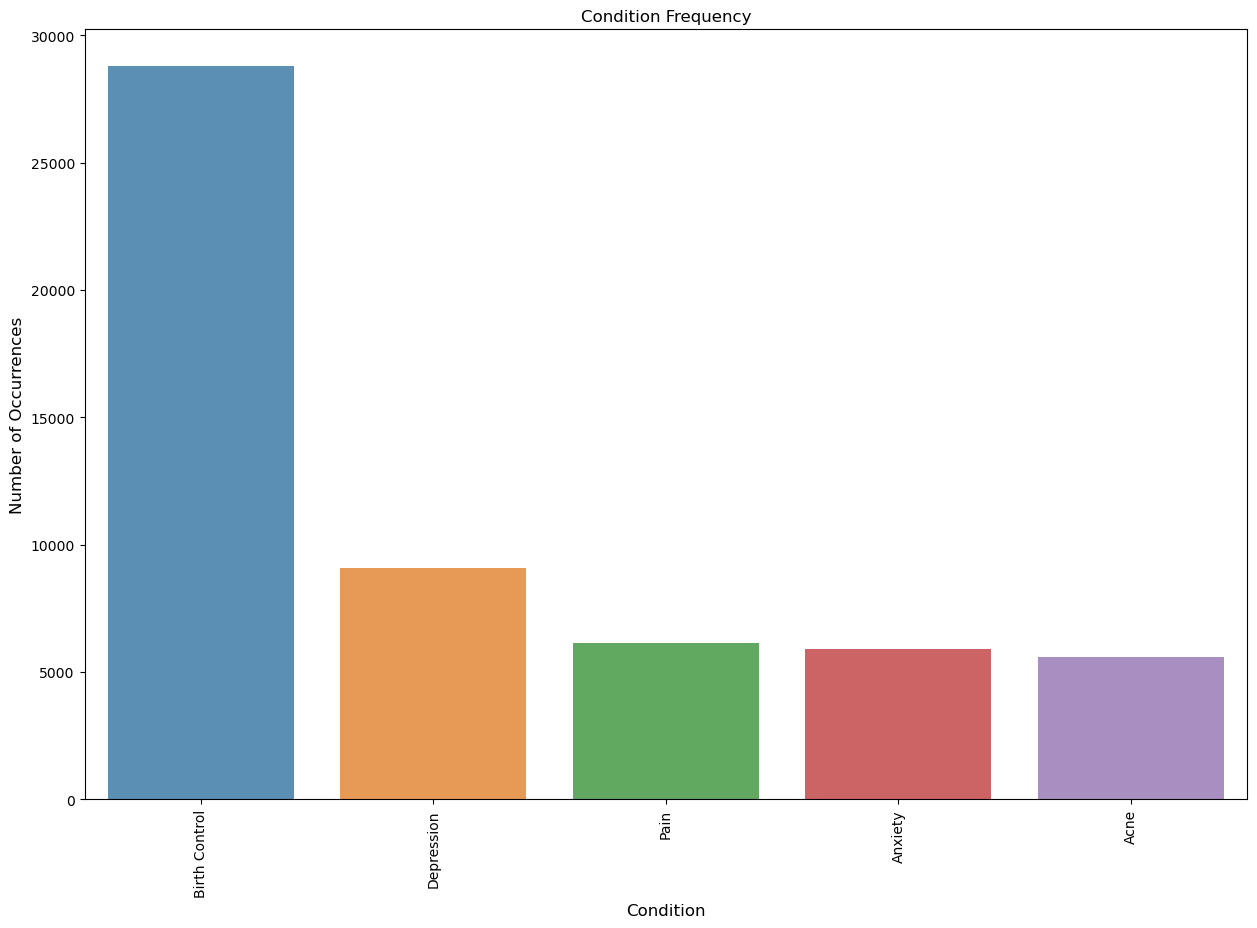

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
condition_counts = data_first_stage['condition'].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values, alpha=0.8)
plt.title('Condition Frequency')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()



In [18]:
import random

# Get a random index
random_index = random.choice(data_first_stage.index)

# Print the review at the random index
print(data_first_stage.loc[random_index, 'review'])


start implanon love great time doctor switch implanon nexplanon assure well form implanon tell nexplanon highly effective pregnancy scare tell bad cramp life regular cramp severe throw stick year nexplanon explanation ready remove year implanon good nexplanon start day day feeling sick time hope post help


In [19]:
print(data_first_stage['rating'].describe())


count    55494.000000
mean         6.725358
std          3.245623
min          1.000000
25%          4.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64


**now lets scale the rating**

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# create a new DataFrame from data_first_stage
data_second_stage = data_first_stage.copy()

# apply the transformation on the new DataFrame
data_second_stage.loc[:, 'rating'] = scaler.fit_transform(data_second_stage[['rating']])




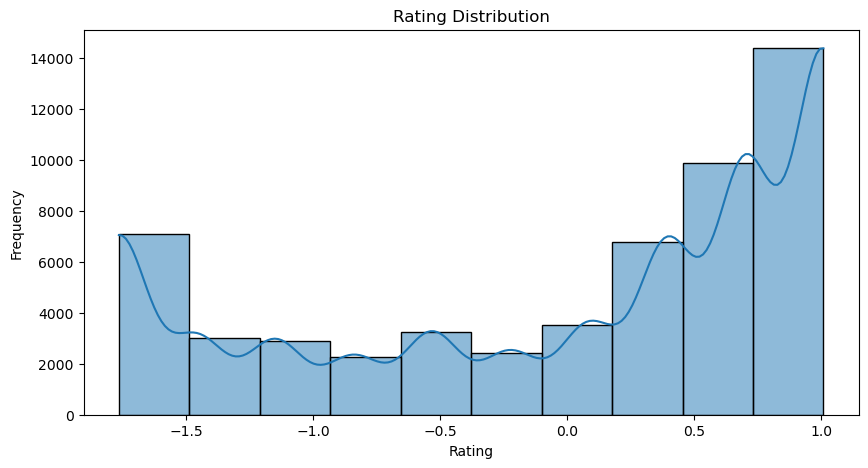

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data_second_stage['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Check for missing values
missing_values = data_first_stage['condition'].isna().sum()
print(f"Number of missing values in 'condition': {missing_values}")

# If there are missing values, drop the corresponding rows
if missing_values > 0:
    data_first_stage = data_first_stage.dropna(subset=['condition'])

# Check again for missing values
missing_values = data_first_stage['condition'].isna().sum()
print(f"Number of missing values in 'condition' after dropping: {missing_values}")


Number of missing values in 'condition': 0
Number of missing values in 'condition' after dropping: 0


In [23]:
from tensorflow.keras import backend as K
K.clear_session()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Convert your categories into numerical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data_first_stage['condition'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_first_stage['review'], labels, test_size=0.2, random_state=42)

# Create a pipeline that first creates bag of word representation then applies the classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),
])

# Train the classifier
model.fit(X_train, y_train)

# Test the classifier
predictions = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1075
           1       0.93      0.79      0.86      1184
           2       0.97      0.99      0.98      5696
           3       0.88      0.92      0.90      1869
           4       0.95      0.96      0.95      1275

    accuracy                           0.95     11099
   macro avg       0.94      0.92      0.93     11099
weighted avg       0.95      0.95      0.95     11099



In [25]:
from joblib import dump

# Save the model to a file
dump(model, 'model_rndomFor.joblib') 


['model_rndomFor.joblib']

In [26]:
# Load the test data
test_data_raw = pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv')

# Filter the conditions
conditions_to_include = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']
# Filter the conditions and make a copy of the dataframe
test_data = test_data_raw[test_data_raw['condition'].isin(conditions_to_include)].copy()

# Now you can apply the changes to test_data without affecting test_data_raw
test_data['review'] = test_data['review'].apply(preprocess_text)
test_data['condition'] = label_encoder.transform(test_data['condition'])


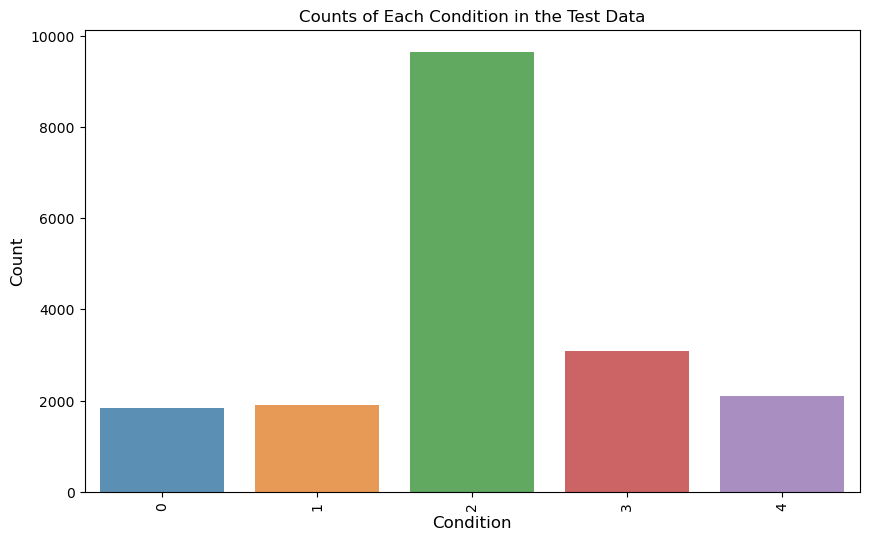

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each condition
condition_counts = test_data['condition'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, alpha=0.8)
plt.title('Counts of Each Condition in the Test Data')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [28]:
# Use the model to predict sentiments for the test data
test_predictions = model.predict(test_data['review'])

# Convert the probabilities to class labels
predicted_labels = [np.argmax(prediction) for prediction in test_predictions]

# Now predicted_labels contains the predicted labels for the test data


In [29]:
# Convert the numeric labels back to original classes
predicted_conditions = label_encoder.inverse_transform(predicted_labels)
actual_conditions = label_encoder.inverse_transform(test_data['condition'])

# Create a dataframe that includes the predicted and actual labels
results = pd.DataFrame({'Predicted Condition': predicted_conditions, 'Actual Condition': actual_conditions})

# Print the dataframe
print(results.head())


  Predicted Condition Actual Condition
0                Acne       Depression
1                Acne    Birth Control
2                Acne    Birth Control
3                Acne    Birth Control
4                Acne             Acne


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(actual_conditions, predicted_conditions)
precision = precision_score(actual_conditions, predicted_conditions, average='weighted')
recall = recall_score(actual_conditions, predicted_conditions, average='weighted')
f1 = f1_score(actual_conditions, predicted_conditions, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.09931175395203785
Precision: 0.009862824473030107
Recall: 0.09931175395203785
F1 Score: 0.017943635074533032


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a pipeline that first creates bag of word representation then applies the classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# Train the classifier
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1075
           1       0.94      0.44      0.60      1184
           2       0.88      1.00      0.93      5696
           3       0.73      0.87      0.80      1869
           4       0.98      0.80      0.88      1275

    accuracy                           0.87     11099
   macro avg       0.90      0.77      0.81     11099
weighted avg       0.88      0.87      0.86     11099

Accuracy: 0.8678259302639878
Precision: 0.8803148785954202
Recall: 0.8678259302639878
F1 Score: 0.8587991304366392


In [32]:
import joblib

# Save the model to a file
joblib.dump(model, 'naive_bayes_model.pkl')

# Later you can load the model from the file with:
# model = joblib.load('naive_bayes_model.pkl')


['naive_bayes_model.pkl']

In [33]:
# Select a random review and its corresponding condition from the test data
random_index = np.random.choice(test_data.index)
random_review = test_data.loc[random_index, 'review']
actual_condition = label_encoder.inverse_transform([test_data.loc[random_index, 'condition']])

print("Original review: \n", random_review)

# Use the model to predict the sentiment of this review
prediction = model.predict([random_review])

# The output of the model is the predicted class label
predicted_condition = label_encoder.inverse_transform([prediction])

print("\nPredicted condition: ", predicted_condition)
print("Actual condition: ", actual_condition)


Original review: 
 skyla insert morning attest long term effect want share experience get freak read horror story think come provide insight let start say thing take minute painful part minute combine like get pap measure far deep breath lady fun quickly skyla fun quickly major cramp minute suggest stay lie feel pretty normal advil heating pad

Predicted condition:  ['Birth Control']
Actual condition:  ['Birth Control']


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline that first creates bag of word representation then applies the classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear')),
])

# Train the classifier
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1075
           1       0.85      0.74      0.79      1184
           2       0.96      0.98      0.97      5696
           3       0.84      0.89      0.86      1869
           4       0.94      0.94      0.94      1275

    accuracy                           0.93     11099
   macro avg       0.91      0.88      0.89     11099
weighted avg       0.92      0.93      0.92     11099

Accuracy: 0.9251283899450401
Precision: 0.9246071786370135
Recall: 0.9251283899450401
F1 Score: 0.9241121228165323


In [35]:
# Select a random review and its corresponding condition from the test data
random_index = np.random.choice(test_data.index)
random_review = test_data.loc[random_index, 'review']
actual_condition = label_encoder.inverse_transform([test_data.loc[random_index, 'condition']])

print("Original review: \n", random_review)

# Use the model to predict the sentiment of this review
prediction = model.predict([random_review])

# The output of the model is the predicted class label
predicted_condition = label_encoder.inverse_transform([prediction])

print("\nPredicted condition: ", predicted_condition)
print("Actual condition: ", actual_condition)

Original review: 
 acne year prescribe doxy week take day pimple get day fifth day small bump forehead forehead clear issue severe headache night head feel tight get small rash arm size coin forth day day small rash body chest boob cover little spot white head issue chest stairs area dry sore honestly stand effect worth pain

Predicted condition:  ['Acne']
Actual condition:  ['Acne']


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_transformed = vectorizer.transform(X_test)

# Define the three models to use in the ensemble
model1 = make_pipeline(TfidfVectorizer(), LogisticRegression())
model2 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model3 = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('nb', model2), ('dt', model3)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = ensemble_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1075
           1       0.89      0.76      0.82      1184
           2       0.95      0.99      0.97      5696
           3       0.86      0.91      0.88      1869
           4       0.97      0.93      0.95      1275

    accuracy                           0.93     11099
   macro avg       0.93      0.89      0.91     11099
weighted avg       0.93      0.93      0.93     11099

Accuracy: 0.9337778178214253
Precision: 0.9338687315721959
Recall: 0.9337778178214253
F1 Score: 0.9326018570170145


In [37]:
import joblib

# Save the model to a file
joblib.dump(ensemble_model, 'ensemble_model.pkl')

# Later you can load the model from the file with:
# ensemble_model = joblib.load('ensemble_model.pkl')


['ensemble_model.pkl']

In [38]:
# Load the model from the file
ensemble_model = joblib.load('/kaggle/working/ensemble_model.pkl')


In [39]:
# Use the model to predict the conditions of the reviews in the test set
predicted_conditions = ensemble_model.predict(test_data['review'])

# Convert the numeric labels back to the original conditions
predicted_conditions = label_encoder.inverse_transform(predicted_conditions)

# Create a DataFrame to compare the actual and predicted conditions
comparison_df = pd.DataFrame({
    'Actual Condition': label_encoder.inverse_transform(test_data['condition']),
    'Predicted Condition': predicted_conditions
})

print(comparison_df)


      Actual Condition Predicted Condition
0           Depression          Depression
1        Birth Control       Birth Control
2        Birth Control       Birth Control
3        Birth Control       Birth Control
4                 Acne       Birth Control
...                ...                 ...
18593    Birth Control       Birth Control
18594    Birth Control       Birth Control
18595          Anxiety          Depression
18596    Birth Control       Birth Control
18597             Pain                Pain

[18598 rows x 2 columns]
